In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

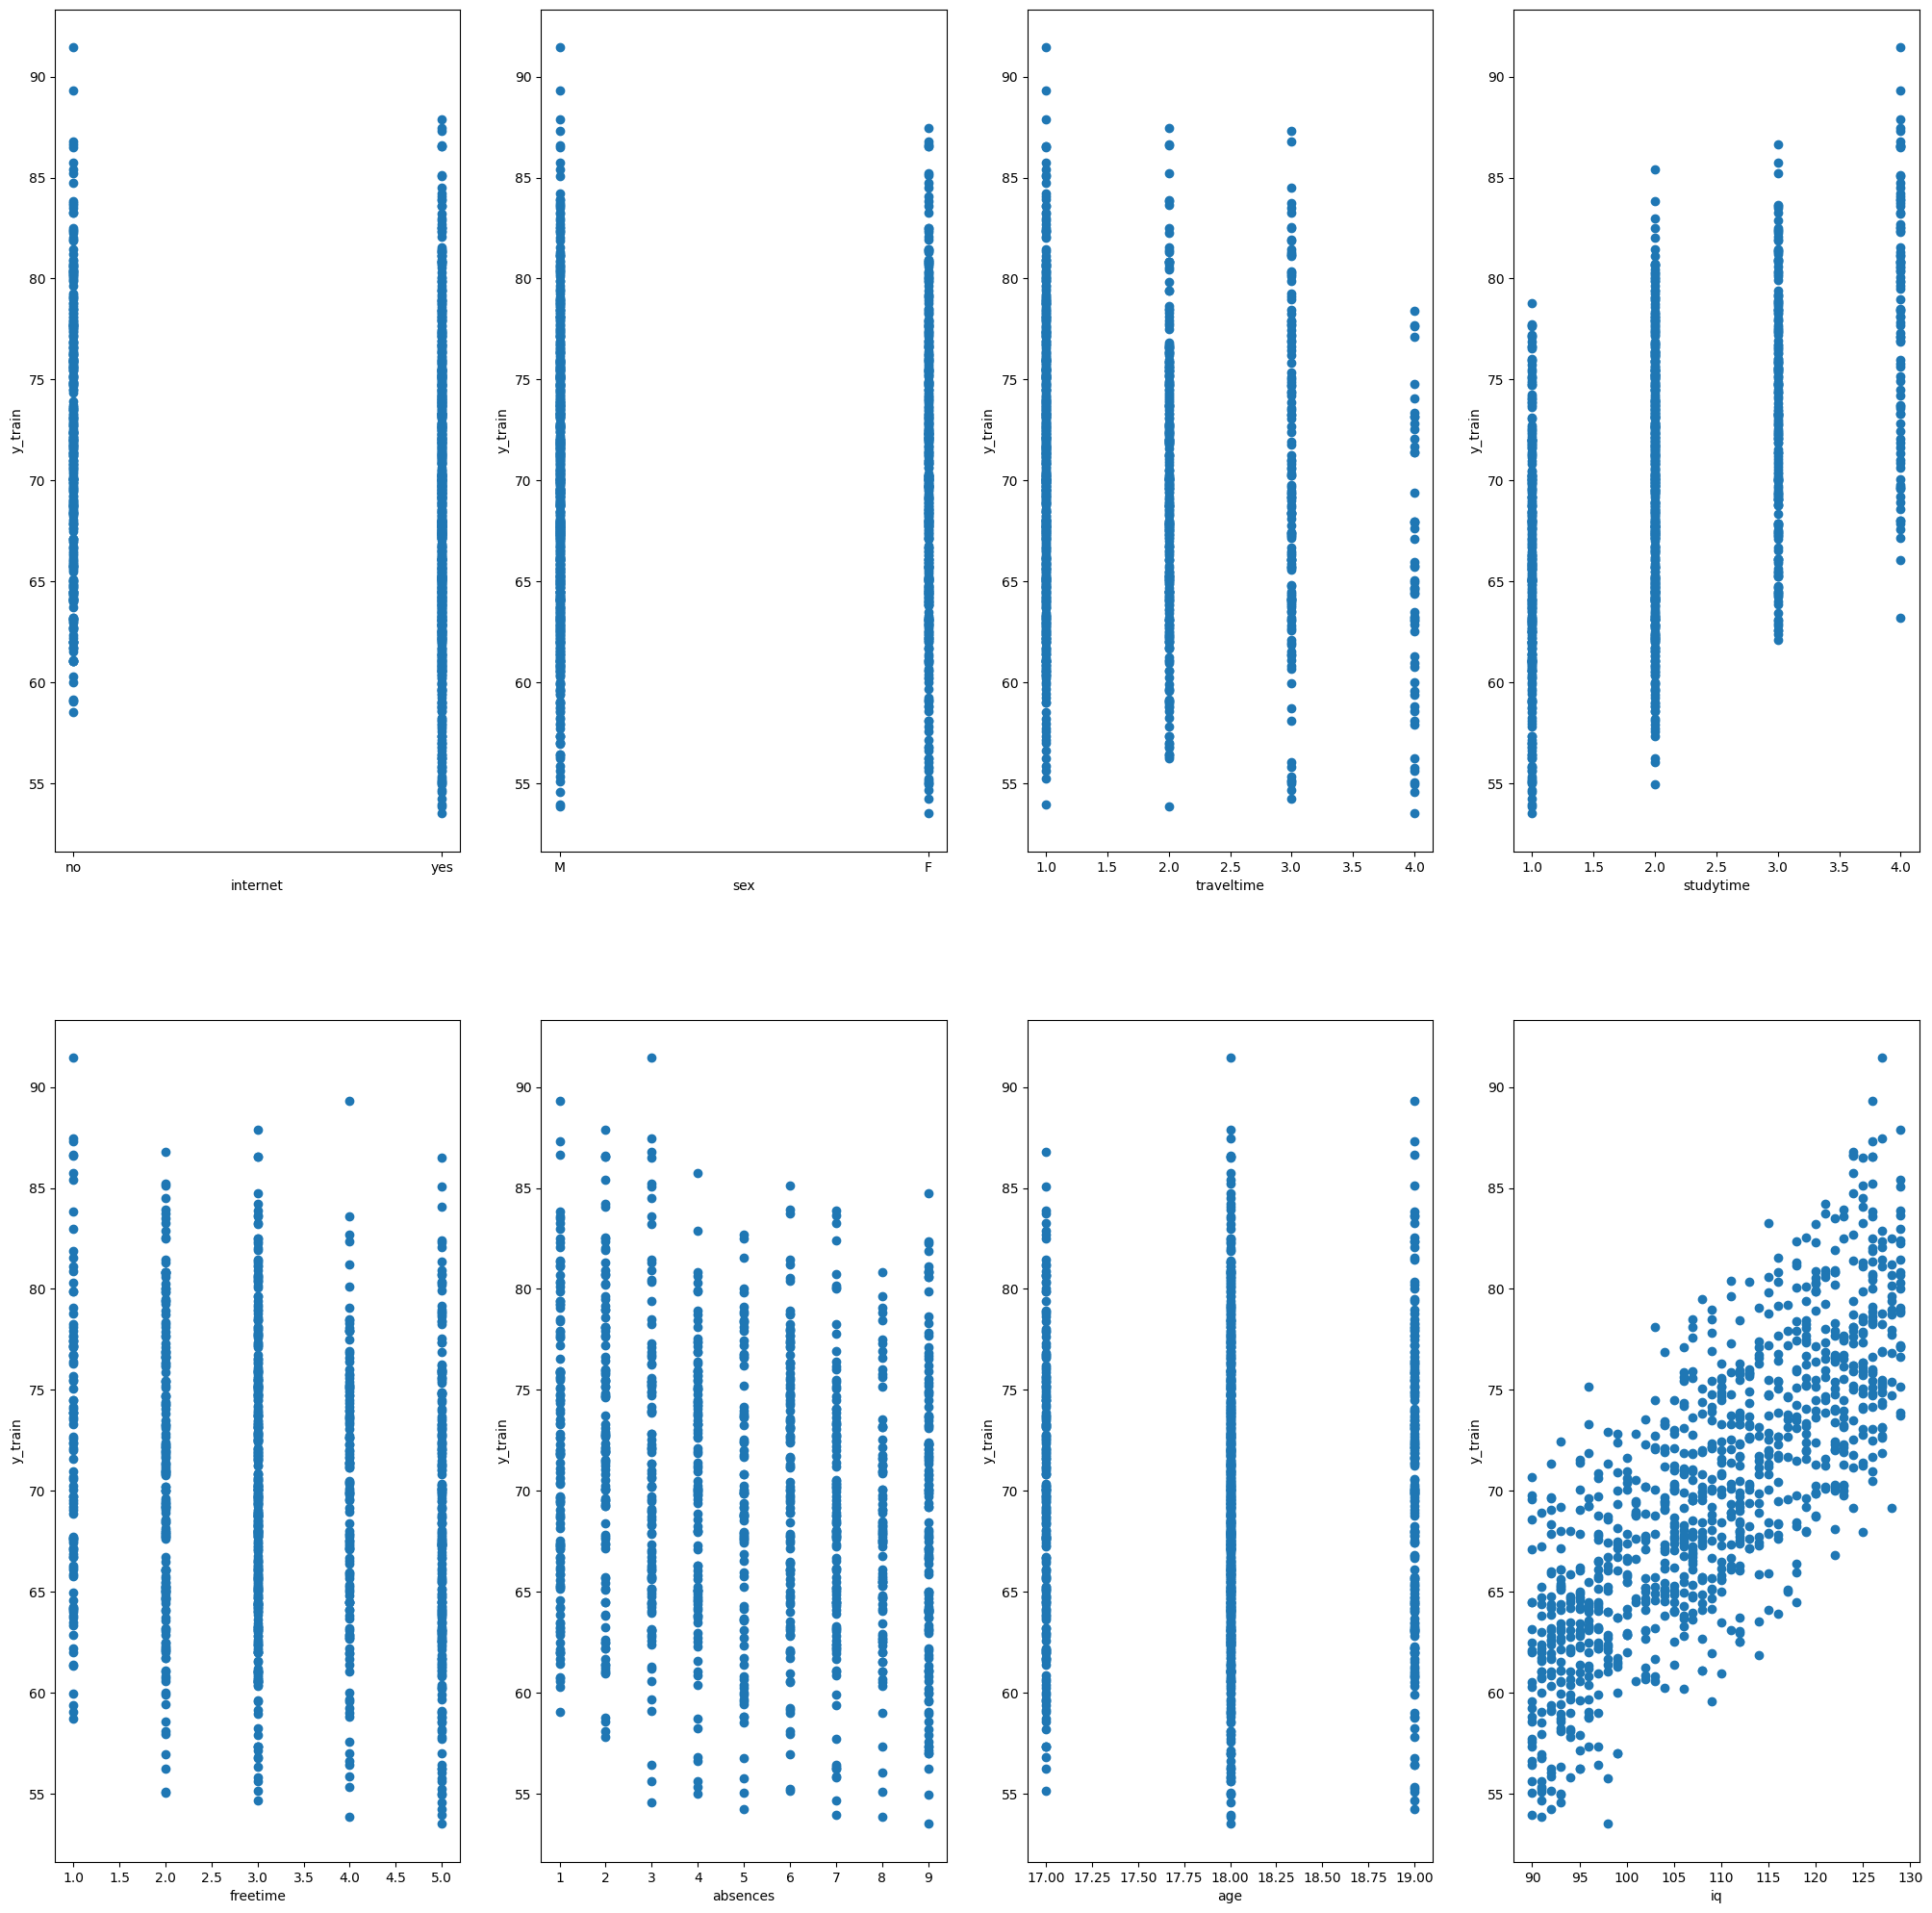

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

fig, axs = plt.subplots(2, 4, figsize=(25, 25))  # Adjust the grid size based on the number of features
x_labels = data.columns

for i in range(x_train.shape[1]):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(x_train[:, i], y_train)
    axs[row, col].set_xlabel(x_labels[i])
    axs[row, col].set_ylabel('y_train')


plt.show()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  m = x_train.shape[0]  #No. of training examples
  n = x_train.shape[1]  #No. of features
  for i in range(m):
    if x_train[i,0] == 'no':
       x_train[i,0] = 0
    else: x_train[i,0] = 1

    if x_train[i,1]== 'M':
       x_train[i,1]= 0
    else: x_train[i,1]=1
  
  return x_train


x_train = feature_changing(x_train)


In [3]:

def z_score(x_train):
  x_train = x_train.astype(np.int64)
  x_mean = np.mean(x_train, axis=0)
  x_std = np.std(x_train, axis=0)
  x_train = (x_train - x_mean)/x_std
  a = x_mean
  return x_train,x_std,x_mean



In [4]:
def cost(x_train,y_train,w,b):
  loss = 0
  m = x_train.shape[0]
  
  for i in range(m):
    err = np.dot(x_train[i,:],w) + b - y_train[i]
    err1 = err[0]
    loss = loss + err1*err1/(m*2)
  return loss

In [5]:
def derivative(x_train,y_train,w,b):
    m = x_train.shape[0]  #No. of training examples
    n = x_train.shape[1]  #No. of features

    dj_dw = np.zeros(n)
    dj_db = 0
    dj_dw = dj_dw.reshape(n,1)

    for i in range(m):
        err = np.dot(x_train[i,:],w) + b - y_train[i]
        err1 = err[0]
        dj_db = dj_db + err1/m
        for k in range(n):
            dj_dw[k,0] = dj_dw[k,0] + err1*x_train[i,k]/m 

    return dj_dw , dj_db



In [6]:
def gradient_descent(x_train,y_train,w,b):
    step = 0.1
    W = np.insert(w,0,b)
    W = W.reshape(-1,1)
    X_train_biased = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
    prediction = np.dot(X_train_biased, W)
    error = prediction - y_train
    dJ = (2/x_train.shape[0])*np.dot(X_train_biased.T, error)
    W = W - step* dJ
    b = W[0]
    w = W[1:]
    return w,b

In [7]:
#x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(214783647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

i = 0
old_cost = 0
w_arr = np.zeros(1000)
j_arr = np.zeros(1000)

while abs(old_cost - cost(x_train,y_train,w,b))>0.001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
  
  

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

dotproduct = (np.dot(x_predict,w))
y_predict = dotproduct + b[0]


accuracy = 0
for dim in range(len(ans)):
  if np.absolute(y_predict[dim,0]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
